<a href="https://colab.research.google.com/github/comrade-pavel-sergeevich/de2/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D1%8D%D0%BF%D0%B8%D0%B4%D0%B5%D0%BC%D0%B8%D0%B8_%D1%81_%D0%BB%D0%BE%D0%BA%D0%B4%D0%B0%D1%83%D0%BD%D0%B0%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

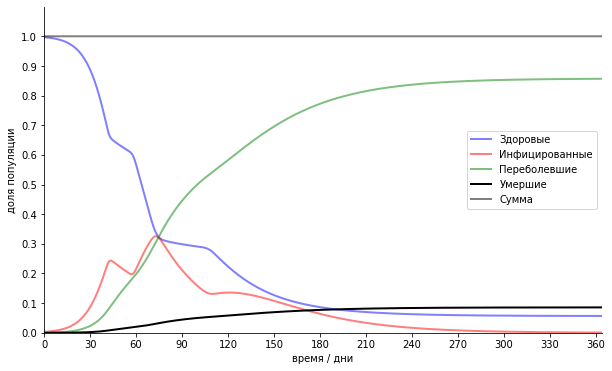

In [38]:
# SISD
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
 
N = 1000 # Total population, N.
days = 364
 
I0 = 3 # Initial number of infected individuals
S0 = N - I0
R0 = 0
D0=0
 
beta, gamma,nu = 0.00015, 0.03,0.003 # Contact rate beta
 
t = np.linspace(0, days, days*4)  # A grid of time points (in days)
 
# The SISD model differential equations.
def lock(x):
    return 1-(1/1.2*np.exp(-(((x**0.7-50**0.7)**8)/100))+1/1.1*np.exp(-(((x**0.6-90**0.6)**8)/100))) # первый локдаун ~2 недели, на пике снижение заболеваемости на 83% второй — ~месяц, 91% 
def deriv(y, t, N, beta, gamma):
    S, I, R, D = y
    dSdt = -beta *lock(t) * S * I
    dIdt = beta *lock(t)* S * I - gamma * I -nu*I
    dRdt = gamma * I
    dDdt = nu*I
    return dSdt, dIdt, dRdt,dDdt
 
y0 = S0, I0, R0, D0 # Initial conditions vector
ret = odeint(deriv, y0, t, args=(N, beta, gamma))  # Integrate the SIR equations over the time grid, t.
S, I, R, D = ret.T
 
fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(0, days), ylim=(0, 1.1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Здоровые')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Инфицированные')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Переболевшие')
ax.plot(t, D/N, 'k', alpha=1, lw=2, label='Умершие')
ax.plot(t, (S+I+R+D)/N, 'k', alpha=0.5, lw=2, label='Сумма')
ax.set_xticks(np.arange(0, days, 30))
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.legend()
ax.set_xlabel('время / дни')
ax.set_ylabel('доля популяции')
plt.show()